In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import warnings
import os
from homeharvest import scrape_property
from datetime import datetime
warnings.filterwarnings('ignore')

In [2]:
# Generate filename based on current timestamp
current_timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
filename = f"HomeHarvest_pending_{current_timestamp}.csv"

#Fetching all pending properties
properties_pending = scrape_property(
  location="Jersey City, NJ",
  listing_type="pending",  # or (for_sale, for_rent, pending)
  past_days=90,  # sold in last 30 days - listed in last 30 days if (for_sale, for_rent)

  # date_from="2023-05-01", # alternative to past_days
  # date_to="2023-05-28",
  # foreclosure=True
  mls_only=True,  # only fetch MLS listings
  extra_property_data = True
)
print(f"Number of properties: {len(properties_pending)}")

# Export to csv
properties_pending.to_csv(filename, index=False)
#print(properties_pending.head())

Number of properties: 329


In [3]:
# Fetch all rent properties
filename = f"HomeHarvest_for_rent_{current_timestamp}.csv"

properties_for_rent = scrape_property(
  location="Jersey City, NJ",
  listing_type="for_rent",  # or (for_sale, for_rent, pending)
  past_days=90,  # sold in last 30 days - listed in last 30 days if (for_sale, for_rent)

  # date_from="2023-05-01", # alternative to past_days
  # date_to="2023-05-28",
  # foreclosure=True
  mls_only=True,  # only fetch MLS listings
  extra_property_data = True
)
print(f"Number of properties: {len(properties_for_rent)}")

# Export to csv
properties_for_rent.to_csv(filename, index=False)
#print(properties_for_rent.head())

Number of properties: 1078


In [4]:
# Fetch all sold properties
filename = f"HomeHarvest_for_sale_{current_timestamp}.csv"
properties_for_sale = scrape_property(
  location="Jersey City, NJ",
  listing_type="for_sale",  # or (for_sale, for_rent, pending)
  past_days=90,  # sold in last 30 days - listed in last 30 days if (for_sale, for_rent)

  # date_from="2023-05-01", # alternative to past_days
  # date_to="2023-05-28",
  # foreclosure=True
  mls_only=True,  # only fetch MLS listings
  extra_property_data = True
)
print(f"Number of properties: {len(properties_for_sale)}")

# Export to csv
properties_for_sale.to_csv(filename, index=False)
#print(properties_for_sale.head())

Number of properties: 1093


In [5]:
# Fetch all sold properties
filename = f"HomeHarvest_sold_{current_timestamp}.csv"
properties_sold = scrape_property(
  location="Jersey City, NJ",
  listing_type="sold",  # or (for_sale, for_rent, pending)
  past_days=90,  # sold in last 30 days - listed in last 30 days if (for_sale, for_rent)

  # date_from="2023-05-01", # alternative to past_days
  # date_to="2023-05-28",
  # foreclosure=True
  mls_only=True,  # only fetch MLS listings
  extra_property_data = True
)
print(f"Number of properties: {len(properties_for_sale)}")

# Export to csv
properties_sold.to_csv(filename, index=False)
#print(properties_sold.head())

Number of properties: 1093


In [6]:
!pwd

/content


In [7]:
pwd='/usr/Data'

In [8]:
dfs = []

# iterate over all CSV files in the directory
for file in os.listdir(pwd):
    if file.endswith('.csv'):
        # read the CSV file
        file_path = os.path.join(pwd, file)
        dfd = pd.read_csv(file_path)

        # add the DataFrame to the list
        dfs.append(dfd)

# merge all DataFrames into a single one
df = pd.concat(dfs, ignore_index=True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2874 entries, 0 to 2873
Data columns (total 43 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   property_url      2874 non-null   object 
 1   mls               2874 non-null   object 
 2   mls_id            2874 non-null   object 
 3   status            2874 non-null   object 
 4   text              2823 non-null   object 
 5   style             2874 non-null   object 
 6   full_street_line  2873 non-null   object 
 7   street            2871 non-null   object 
 8   unit              1955 non-null   object 
 9   city              2874 non-null   object 
 10  state             2874 non-null   object 
 11  zip_code          2873 non-null   float64
 12  beds              2754 non-null   float64
 13  full_baths        2733 non-null   float64
 14  half_baths        462 non-null    float64
 15  sqft              1631 non-null   float64
 16  year_built        119 non-null    float64


In [10]:
df.describe()

,zip_code,beds,full_baths,half_baths,sqft,year_built,days_on_mls,list_price,sold_price,assessed_value,estimated_value,lot_sqft,price_per_sqft,latitude,longitude,fips_code,stories,hoa_fee,parking_garage
count,2873.000000,2754.000000,2733.000000,462.000000,1631.000000,119.000000,2869.000000,2.776000e+03,1.253000e+03,1.294000e+03,1.176000e+03,5.830000e+02,1631.000000,2815.000000,2815.000000,2815.0,1383.000000,891.000000,749.000000
mean,7304.369997,2.725127,1.832053,1.060606,1179.828326,1957.672269,42.412687,5.589759e+05,8.662769e+05,2.068533e+06,9.272781e+05,1.198334e+04,446.922747,40.723709,-74.060244,34017.0,2.058568,866.952862,1.624833
std,9.992610,1.845752,0.971767,0.288248,703.205397,53.785215,34.440312,5.938487e+05,7.613572e+06,1.543723e+07,2.612863e+06,8.356878e+04,379.541690,0.015381,0.018538,0.0,1.229832,6735.172916,4.062937
min,7030.000000,0.000000,1.000000,1.000000,300.000000,1863.000000,0.000000,4.000000e+02,1.000000e+00,1.000000e+03,8.530000e+04,6.250000e+02,1.000000,40.685927,-74.107315,34017.0,1.000000,0.000000,1.000000
25%,7302.000000,1.000000,1.000000,1.000000,774.500000,1900.000000,16.000000,3.450000e+03,2.680000e+05,2.438000e+05,5.493960e+05,1.749500e+03,4.000000,40.714597,-74.074868,34017.0,2.000000,296.000000,1.000000
50%,7305.000000,2.000000,2.000000,1.000000,1078.000000,1961.000000,37.000000,5.200000e+05,5.000000e+05,3.749000e+05,7.187680e+05,2.426000e+03,450.000000,40.721790,-74.054960,34017.0,2.000000,459.000000,1.000000
75%,7306.000000,3.000000,2.000000,1.000000,1410.000000,2010.000000,62.000000,8.500000e+05,7.800000e+05,6.193000e+05,9.759288e+05,2.614000e+03,749.500000,40.734377,-74.045502,34017.0,2.000000,747.000000,2.000000
max,7311.000000,12.000000,9.000000,4.000000,19998.000000,2024.000000,301.000000,7.150000e+06,2.638000e+08,2.903173e+08,8.478277e+07,1.165230e+06,1818.000000,40.772652,-74.013512,34017.0,34.000000,142568.000000,79.000000


In [11]:
df.isnull().sum()

property_url           0
mls                    0
mls_id                 0
status                 0
text                  51
style                  0
full_street_line       1
street                 3
unit                 919
city                   0
state                  0
zip_code               1
beds                 120
full_baths           141
half_baths          2412
sqft                1243
year_built          2755
days_on_mls            5
list_price            98
list_date              0
sold_price          1621
last_sold_date      1621
assessed_value      1580
estimated_value     1698
lot_sqft            2291
price_per_sqft      1243
latitude              59
longitude             59
neighborhoods         66
county                 0
fips_code             59
stories             1491
hoa_fee             1983
parking_garage      2125
agent                 73
agent_email          286
agent_phones         242
broker               516
broker_phone         637
broker_website      1563


In [12]:
df.drop(columns=['property_url','mls','mls_id','text','primary_photo','alt_photos','broker_phone','latitude','longitude'], inplace=True)

In [13]:
df

,status,style,full_street_line,street,unit,city,state,zip_code,beds,full_baths,...,fips_code,stories,hoa_fee,parking_garage,agent,agent_email,agent_phones,broker,broker_website,nearby_schools
0,FOR_RENT,MULTI_FAMILY,163 Bidwell Ave Unit 2,163 Bidwell Ave,Unit 2,Jersey City,NJ,7305.0,4.0,1.0,...,34017.0,NaN,NaN,NaN,Melissa Davis,melissainrealestate@gmail.com,"[{'number': '2014015366', 'type': 'Mobile', 'e...","Weichert, Realtors - Bayonne",NaN,"University Academy Charter High School, Jersey..."
1,FOR_RENT,APARTMENT,163 Baldwin Ave Apt 5,163 Baldwin Ave,Apt 5,Jersey City,NJ,7306.0,1.0,1.0,...,34017.0,NaN,NaN,NaN,Diane Rivera,forsalebydianerivera@gmail.com,"[{'number': '9086883311', 'type': 'Office', 'e...","CENTURY 21 Preferred Realty, Inc.",https://www.century21.com/listingdetail/C21VQ6...,"Hudson County School District Of Technology, J..."
2,FOR_RENT,APARTMENT,67 St Pauls Ave,67 St Pauls Ave,NaN,Jersey City,NJ,7306.0,2.0,1.0,...,34017.0,2.0,NaN,NaN,Jason Kratochvil,jkratochvil2000@yahoo.com,"[{'number': '2018928679', 'type': 'Mobile', 'e...",Liberty Realty,http://www.libertyrealty.com/,"M.E.T.S. Charter School, Jersey City Golden Do..."
3,FOR_RENT,TOWNHOMES,229 8th St Apt 2,229 8th St,Apt 2,Jersey City,NJ,7302.0,1.0,1.0,...,34017.0,2.0,NaN,NaN,Andrew Botticelli,botticellirealestate@gmail.com,"[{'number': '2015198500', 'type': 'Mobile', 'e...","COMPASS NEW JERSEY, LLC",HTTPS://WWW.COMPASS.COM/,"M.E.T.S. Charter School, Hudson County School ..."
4,FOR_RENT,MULTI_FAMILY,69 Greenville Ave,69 Greenville Ave,NaN,Jersey City,NJ,7305.0,2.0,1.0,...,34017.0,NaN,NaN,NaN,Bibi Nobrega,NaN,NaN,CHRISTIE'S INT. REAL ESTATE NNJ Mahwah,www.christiesrennj.com,"Soaraing Heights Charter School, University Ac..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2869,SOLD,CONDOS,10 Regent St Apt 108,10 Regent St,Apt 108,Jersey City,NJ,7302.0,1.0,1.0,...,34017.0,NaN,597.0,NaN,Dean Clark,dean@deanclarkgroup.com,"[{'number': '2016394940', 'type': 'Mobile', 'e...",NaN,NaN,"Great Futures Charter School, Beloved Communit..."
2870,SOLD,CONDOS,202 6th St Apt 2L,202 6th St,Apt 2L,Jersey City,NJ,7302.0,1.0,1.0,...,34017.0,NaN,377.0,NaN,Caterina Peters,caterina.peters@compass.com,"[{'number': '7188091917', 'type': 'Other', 'ex...",NaN,NaN,"M.E.T.S. Charter School, Hudson County School ..."
2871,SOLD,MULTI_FAMILY,31 Leonard St,31 Leonard St,NaN,Jersey City,NJ,7307.0,5.0,2.0,...,34017.0,NaN,NaN,2.0,Ellason Curdgele,Ellason.Curdgele@coldwellbankermoves.com,"[{'number': '2019141694', 'type': 'Office', 'e...",NaN,NaN,"M.E.T.S. Charter School, Hoboken Charter Schoo..."
2872,SOLD,CONDOS,138 Leonard St Apt 3R,138 Leonard St,Apt 3R,Jersey City,NJ,7307.0,2.0,2.0,...,34017.0,NaN,325.0,NaN,Megan Gulick,megang@sawyersmith.com,"[{'number': '5516975158', 'type': 'Mobile', 'e...",NaN,NaN,"Hudson County School District Of Technology, H..."


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2874 entries, 0 to 2873
Data columns (total 34 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   status            2874 non-null   object 
 1   style             2874 non-null   object 
 2   full_street_line  2873 non-null   object 
 3   street            2871 non-null   object 
 4   unit              1955 non-null   object 
 5   city              2874 non-null   object 
 6   state             2874 non-null   object 
 7   zip_code          2873 non-null   float64
 8   beds              2754 non-null   float64
 9   full_baths        2733 non-null   float64
 10  half_baths        462 non-null    float64
 11  sqft              1631 non-null   float64
 12  year_built        119 non-null    float64
 13  days_on_mls       2869 non-null   float64
 14  list_price        2776 non-null   float64
 15  list_date         2874 non-null   object 
 16  sold_price        1253 non-null   float64


In [15]:
df.isnull().sum()

status                 0
style                  0
full_street_line       1
street                 3
unit                 919
city                   0
state                  0
zip_code               1
beds                 120
full_baths           141
half_baths          2412
sqft                1243
year_built          2755
days_on_mls            5
list_price            98
list_date              0
sold_price          1621
last_sold_date      1621
assessed_value      1580
estimated_value     1698
lot_sqft            2291
price_per_sqft      1243
neighborhoods         66
county                 0
fips_code             59
stories             1491
hoa_fee             1983
parking_garage      2125
agent                 73
agent_email          286
agent_phones         242
broker               516
broker_website      1563
nearby_schools        59
dtype: int64

In [16]:
# prompt: remove duplicates

df.drop_duplicates(inplace=True)
df


,status,style,full_street_line,street,unit,city,state,zip_code,beds,full_baths,...,fips_code,stories,hoa_fee,parking_garage,agent,agent_email,agent_phones,broker,broker_website,nearby_schools
0,FOR_RENT,MULTI_FAMILY,163 Bidwell Ave Unit 2,163 Bidwell Ave,Unit 2,Jersey City,NJ,7305.0,4.0,1.0,...,34017.0,NaN,NaN,NaN,Melissa Davis,melissainrealestate@gmail.com,"[{'number': '2014015366', 'type': 'Mobile', 'e...","Weichert, Realtors - Bayonne",NaN,"University Academy Charter High School, Jersey..."
1,FOR_RENT,APARTMENT,163 Baldwin Ave Apt 5,163 Baldwin Ave,Apt 5,Jersey City,NJ,7306.0,1.0,1.0,...,34017.0,NaN,NaN,NaN,Diane Rivera,forsalebydianerivera@gmail.com,"[{'number': '9086883311', 'type': 'Office', 'e...","CENTURY 21 Preferred Realty, Inc.",https://www.century21.com/listingdetail/C21VQ6...,"Hudson County School District Of Technology, J..."
2,FOR_RENT,APARTMENT,67 St Pauls Ave,67 St Pauls Ave,NaN,Jersey City,NJ,7306.0,2.0,1.0,...,34017.0,2.0,NaN,NaN,Jason Kratochvil,jkratochvil2000@yahoo.com,"[{'number': '2018928679', 'type': 'Mobile', 'e...",Liberty Realty,http://www.libertyrealty.com/,"M.E.T.S. Charter School, Jersey City Golden Do..."
3,FOR_RENT,TOWNHOMES,229 8th St Apt 2,229 8th St,Apt 2,Jersey City,NJ,7302.0,1.0,1.0,...,34017.0,2.0,NaN,NaN,Andrew Botticelli,botticellirealestate@gmail.com,"[{'number': '2015198500', 'type': 'Mobile', 'e...","COMPASS NEW JERSEY, LLC",HTTPS://WWW.COMPASS.COM/,"M.E.T.S. Charter School, Hudson County School ..."
4,FOR_RENT,MULTI_FAMILY,69 Greenville Ave,69 Greenville Ave,NaN,Jersey City,NJ,7305.0,2.0,1.0,...,34017.0,NaN,NaN,NaN,Bibi Nobrega,NaN,NaN,CHRISTIE'S INT. REAL ESTATE NNJ Mahwah,www.christiesrennj.com,"Soaraing Heights Charter School, University Ac..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2869,SOLD,CONDOS,10 Regent St Apt 108,10 Regent St,Apt 108,Jersey City,NJ,7302.0,1.0,1.0,...,34017.0,NaN,597.0,NaN,Dean Clark,dean@deanclarkgroup.com,"[{'number': '2016394940', 'type': 'Mobile', 'e...",NaN,NaN,"Great Futures Charter School, Beloved Communit..."
2870,SOLD,CONDOS,202 6th St Apt 2L,202 6th St,Apt 2L,Jersey City,NJ,7302.0,1.0,1.0,...,34017.0,NaN,377.0,NaN,Caterina Peters,caterina.peters@compass.com,"[{'number': '7188091917', 'type': 'Other', 'ex...",NaN,NaN,"M.E.T.S. Charter School, Hudson County School ..."
2871,SOLD,MULTI_FAMILY,31 Leonard St,31 Leonard St,NaN,Jersey City,NJ,7307.0,5.0,2.0,...,34017.0,NaN,NaN,2.0,Ellason Curdgele,Ellason.Curdgele@coldwellbankermoves.com,"[{'number': '2019141694', 'type': 'Office', 'e...",NaN,NaN,"M.E.T.S. Charter School, Hoboken Charter Schoo..."
2872,SOLD,CONDOS,138 Leonard St Apt 3R,138 Leonard St,Apt 3R,Jersey City,NJ,7307.0,2.0,2.0,...,34017.0,NaN,325.0,NaN,Megan Gulick,megang@sawyersmith.com,"[{'number': '5516975158', 'type': 'Mobile', 'e...",NaN,NaN,"Hudson County School District Of Technology, H..."


In [17]:
df.duplicated().sum()

0

In [18]:
# Creating a instance of label Encoder.
le = LabelEncoder()

# Using .fit_transform function to fit label
# encoder and return encoded label
label = le.fit_transform(df['status'])
label = le.fit_transform(df['style'])
label = le.fit_transform(df['full_street_line'])
label = le.fit_transform(df['street'])
label = le.fit_transform(df['unit'])
label = le.fit_transform(df['city'])
label = le.fit_transform(df['state'])
label = le.fit_transform(df['zip_code'])
label = le.fit_transform(df['beds'])
label = le.fit_transform(df['full_baths'])
label = le.fit_transform(df['half_baths'])
label = le.fit_transform(df['sqft'])
label = le.fit_transform(df['year_built'])
label = le.fit_transform(df['days_on_mls'])
label = le.fit_transform(df['list_price'])
label = le.fit_transform(df['list_date'])
label = le.fit_transform(df['sold_price'])
label = le.fit_transform(df['last_sold_date'])
label = le.fit_transform(df['assessed_value'])
label = le.fit_transform(df['estimated_value'])
label = le.fit_transform(df['lot_sqft'])
label = le.fit_transform(df['price_per_sqft'])
label = le.fit_transform(df['neighborhoods'])
label = le.fit_transform(df['county'])
label = le.fit_transform(df['fips_code'])
label = le.fit_transform(df['stories'])
label = le.fit_transform(df['hoa_fee'])
label = le.fit_transform(df['parking_garage'])
label = le.fit_transform(df['agent'])
label = le.fit_transform(df['agent_phones'])
label = le.fit_transform(df['agent_email'])
label = le.fit_transform(df['broker'])
label = le.fit_transform(df['broker_website'])
label = le.fit_transform(df['nearby_schools'])

# printing label
label


array([57, 20, 44, ..., 35, 17, 32])

In [19]:
df.drop("status", axis=1, inplace=True)
#df.drop("style", axis=1, inplace=True)
df.drop("full_street_line", axis=1, inplace=True)
df.drop("unit", axis=1, inplace=True)
df.drop("city", axis=1, inplace=True)
df.drop("state", axis=1, inplace=True)
df.drop("zip_code", axis=1, inplace=True)
df.drop("beds", axis=1, inplace=True)
df.drop("full_baths", axis=1, inplace=True)
df.drop("half_baths", axis=1, inplace=True)
df.drop("sqft", axis=1, inplace=True)
df.drop("year_built", axis=1, inplace=True)
df.drop("days_on_mls", axis=1, inplace=True)
df.drop("list_price", axis=1, inplace=True)
df.drop("list_date", axis=1, inplace=True)
df.drop("sold_price", axis=1, inplace=True)
df.drop("last_sold_date", axis=1, inplace=True)
df.drop("assessed_value", axis=1, inplace=True)
df.drop("estimated_value", axis=1, inplace=True)
df.drop("lot_sqft", axis=1, inplace=True)
df.drop("price_per_sqft", axis=1, inplace=True)
df.drop("neighborhoods", axis=1, inplace=True)
df.drop("county", axis=1, inplace=True)
df.drop("fips_code", axis=1, inplace=True)
df.drop("stories", axis=1, inplace=True)
df.drop("hoa_fee", axis=1, inplace=True)
df.drop("parking_garage", axis=1, inplace=True)
df.drop("agent", axis=1, inplace=True)
df.drop("agent_email", axis=1, inplace=True)
df.drop("agent_phones", axis=1, inplace=True)
df.drop("broker", axis=1, inplace=True)
df.drop("broker_website", axis=1, inplace=True)
df.drop("nearby_schools", axis=1, inplace=True)





In [20]:
#Appending the array to our dataFrame
# with column name 'Purchased'
df["status"] = label
df["style"] = label
df["full_street_line"] = label
df["street"] = label
df["unit"] = label
df["city"] = label
df["state"] = label
df["zip_code"] = label
df["beds"] = label
df["full_baths"] = label
df["half_baths"] = label
df["sqft"] = label
df["year_built"] = label
df["days_on_mls"] = label
df["list_price"] = label
df["list_date"] = label
df["sold_price"] = label
df["last_sold_price"] = label
df["assessed_value"] = label
df["estimated_value"] = label
df["loft_sqft"] = label
df["price_per_sqft"] = label
df["neighborhoods"] = label
df["county"] = label
df["fips_code"] = label
df["stories"] = label
df["hoa_fee"] = label
df["parking_garage"] = label
df["agent"] = label
df["agent_email"] = label
df["agent_phones"] = label
df["broker"] = label
df["broker_website"] = label
df["nearby_schools"] = label

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2543 entries, 0 to 2873
Data columns (total 34 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   style             2543 non-null   int64
 1   street            2543 non-null   int64
 2   status            2543 non-null   int64
 3   full_street_line  2543 non-null   int64
 4   unit              2543 non-null   int64
 5   city              2543 non-null   int64
 6   state             2543 non-null   int64
 7   zip_code          2543 non-null   int64
 8   beds              2543 non-null   int64
 9   full_baths        2543 non-null   int64
 10  half_baths        2543 non-null   int64
 11  sqft              2543 non-null   int64
 12  year_built        2543 non-null   int64
 13  days_on_mls       2543 non-null   int64
 14  list_price        2543 non-null   int64
 15  list_date         2543 non-null   int64
 16  sold_price        2543 non-null   int64
 17  last_sold_price   2543 non-null   int6

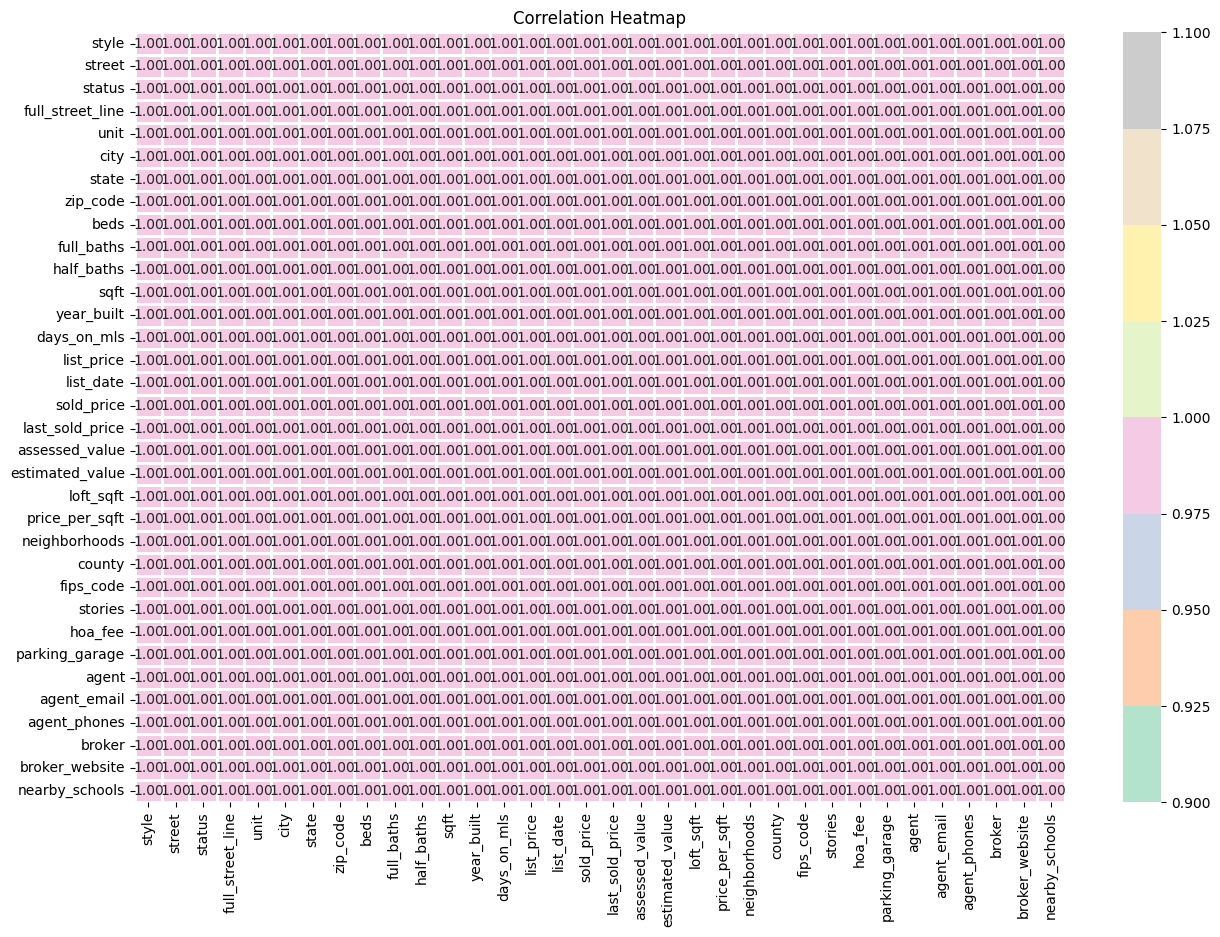

In [22]:
# Assuming 'df' is your DataFrame
plt.figure(figsize=(15, 10))

# Using Seaborn to create a heatmap
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='Pastel2', linewidths=2)

plt.title('Correlation Heatmap')
plt.show()

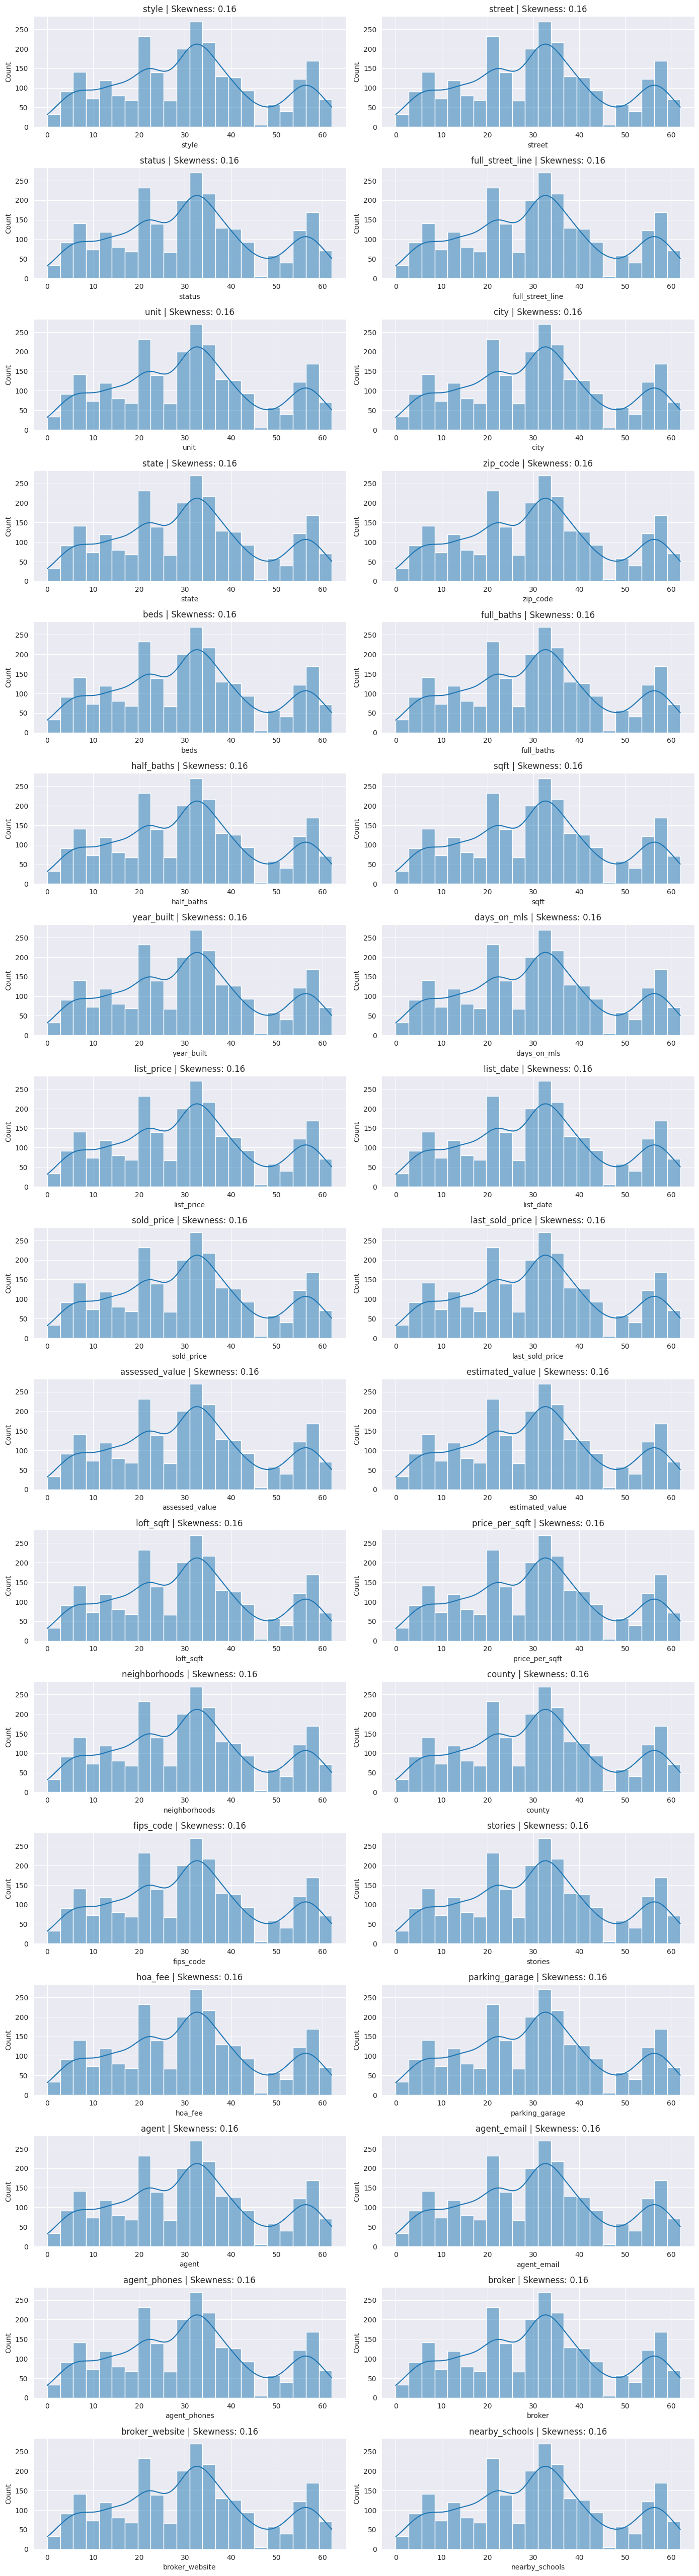

In [23]:
# Set Seaborn style
sns.set_style("darkgrid")

# Identify numerical columns
numerical_columns = df.select_dtypes(include=["int64"]).columns

# Plot distribution of each numerical feature
plt.figure(figsize=(14, len(numerical_columns) * 3))
for idx, feature in enumerate(numerical_columns, 1):
    plt.subplot(len(numerical_columns), 2, idx)
    sns.histplot(df[feature], kde=True)
    plt.title(f"{feature} | Skewness: {round(df[feature].skew(), 2)}")

# Adjust layout and show plots
plt.tight_layout()
plt.show()

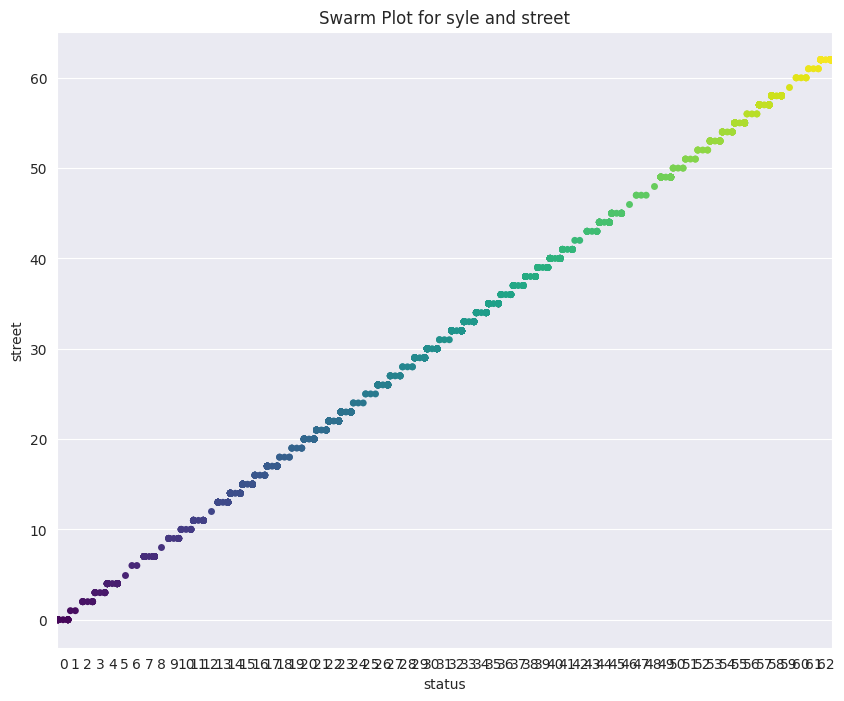

In [24]:
# Assuming 'df' is your DataFrame
plt.figure(figsize=(10, 8))

# Using Seaborn to create a swarm plot
sns.swarmplot(x="status", y="street", data=df, palette='viridis')

plt.title('Swarm Plot for syle and street')
plt.xlabel('status')
plt.ylabel('street')
plt.show()

Implementing machine learning algorithms:

In [25]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
X_train

array([[23, 23, 23, ..., 23, 23, 23],
       [62, 62, 62, ..., 62, 62, 62],
       [30, 30, 30, ..., 30, 30, 30],
       ...,
       [13, 13, 13, ..., 13, 13, 13],
       [ 2,  2,  2, ...,  2,  2,  2],
       [62, 62, 62, ..., 62, 62, 62]])

In [28]:
X_test

array([[32, 32, 32, ..., 32, 32, 32],
       [58, 58, 58, ..., 58, 58, 58],
       [22, 22, 22, ..., 22, 22, 22],
       ...,
       [10, 10, 10, ..., 10, 10, 10],
       [38, 38, 38, ..., 38, 38, 38],
       [32, 32, 32, ..., 32, 32, 32]])

In [29]:
y_train

array([23, 62, 30, ..., 13,  2, 62])

In [30]:
y_test

array([32, 58, 22, 22, 57, 49,  4,  7, 30, 22, 13, 55, 23, 58, 32, 32, 39,
       22, 45, 23, 32, 32, 38, 55, 32, 57, 55, 14, 35, 26, 21,  2, 22,  7,
       62, 55, 44, 30, 55, 32, 45, 35, 40, 45,  7, 32, 57, 32, 29, 22,  7,
        7, 37, 32, 23, 16, 57, 57, 32,  3, 26, 15, 32, 22, 49, 40, 55,  4,
       35,  4, 37, 58, 33, 23, 38, 55, 22,  7, 20, 55, 32, 36, 15, 13, 38,
       26, 29,  7, 13, 58, 18, 20, 13, 50, 27, 58, 34, 35, 32, 33, 13,  7,
       58, 26, 39, 32, 21, 35, 32, 57, 49, 34, 23,  9, 35, 13, 17, 32, 32,
       32, 50, 38, 55, 23, 49, 32,  3, 60, 23, 15, 26, 55, 22, 57, 23, 49,
        4, 52, 44, 58, 49, 23, 40, 14, 29, 62, 55, 35, 39, 30, 20, 29, 14,
       17, 13, 40, 38, 53, 40, 33, 15, 15,  0, 30, 23, 14, 32, 55, 34, 30,
       15, 17, 38, 35, 29,  4, 45, 11, 14,  7, 54,  7, 38, 62, 62, 30, 34,
       44, 58, 53, 61, 34, 35, 40, 23, 17, 32, 29, 34, 40, 35, 39, 32, 55,
       11,  1, 16, 20, 11, 26,  4,  7, 29, 32, 35, 11, 44, 26, 35, 11,  4,
       32, 13, 15, 34, 22

Random Forest

In [31]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
rf = RandomForestClassifier(n_estimators=100, random_state=42,max_depth = None)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [32]:
rf_preds = rf.predict(X)
print("Classification Report")
print("Accuracy : {}".format(accuracy_score(y, rf_preds)))
print("Precision : {}".format(precision_score(y, rf_preds, average = 'macro')))
print("Recall : {}".format(recall_score(y, rf_preds,average = 'macro')))
print("F1 Score : {}".format(f1_score(y, rf_preds,average = 'macro')))

Classification Report
Accuracy : 0.9996067636649626
Precision : 0.9836860670194003
Recall : 0.9841269841269841
F1 Score : 0.9839034205231388


K Nearest Neighbor

In [33]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(X_train, y_train)
knn_preds = knn.predict(X)

In [34]:
print("Classification Report")
print("Accuracy : {}".format(accuracy_score(y, knn_preds)))
print("Precision : {}".format(precision_score(y, knn_preds, average = 'macro')))
print("Recall : {}".format(recall_score(y, knn_preds,average = 'macro')))
print("F1 Score : {}".format(f1_score(y, knn_preds,average = 'macro')))

Classification Report
Accuracy : 0.9693275658670861
Precision : 0.6461353917504845
Recall : 0.6666666666666666
F1 Score : 0.6556835606769766
